# Zestaw 5. Równania nieliniowe

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
from colorsys import rgb_to_hls, hls_to_rgb

Oznaczenia:
* f*_d - dziedzina funkcji f*(x)
* f*_prim - pochodna funkcji f*(x)

### Funkcje do testów

In [10]:
def draw_func(f, f_d, ax=None, color="cornflowerblue", y_label=''):
    if ax is None:
        fig, ax = plt.subplots()
        
    x = np.linspace(float(f_d[0]), float(f_d[1]), 200)
    ax.plot(x, list(map(float, (map(f, x)))), color=color, linewidth=3)
    ax.plot(x, 0*x, color='lightgrey', linewidth=2, zorder=0)
    ax.set_xlabel('x')
    ax.set_ylabel(y_label)

***
> $f_1(x) = \cos(x)\cosh(x) - 1, x \in [\frac{3}{2}\pi, 2\pi]$

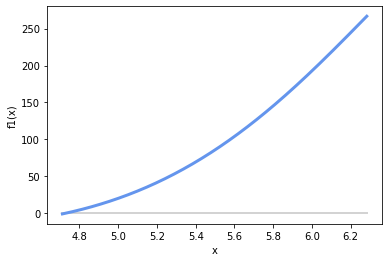

In [11]:
f1 = lambda x: cos(x)*cosh(x) - 1
f1_d = [1.5*pi, 2*pi]

draw_func(f1, f1_d, y_label='f1(x)')

***
> $f_2(x) = \frac{1}{x} - \tan(x), x \in [0, \frac{\pi}{2}]$

z uwagi na fakt, iż funkcja $f_2$ ma osobliwości na końcach zadanego przedziału (konretnie ucieka do +/- nieskończoności), zawężam nieco przedział do: $[0.1, \frac{\pi}{2}-0.1]$. Analizując wykres widzimy, iż nie straciliśmy w ten sposób żadnego pierwiastka, a nawet moglibyśmy zawęzić jeszcze bardziej, by trochę szybciej znaleźć rozwiązanie.

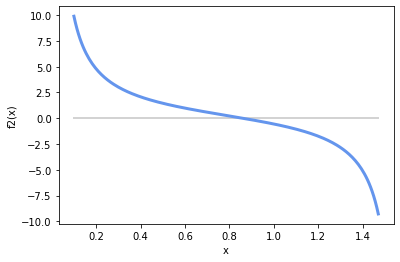

In [12]:
f2 = lambda x: mpf(1/x) - tan(x)
f2_d = [mpf(0.1), pi/2-mpf(0.1)]

draw_func(f2, f2_d, y_label='f2(x)')

***
> $f_3(x) = 2^{-x} + e^{x} + 2\cos(x) - 6, x \in [1, 3]$

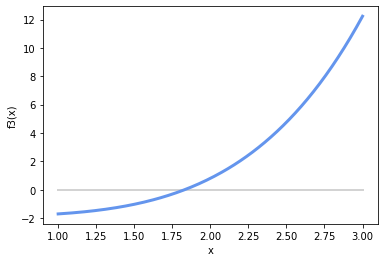

In [13]:
f3 = lambda x: mpf(2**(-x)) + exp(x) + 2*cos(x) - 6
f3_d = [1, 3]

draw_func(f3, f3_d, y_label='f3(x)')

## 1. Metoda bisekcji

<i> Napisz funkcję realizującą metodę bisekcji dla danej funkcji f w oparciu o arytmetykę o
zmiennej precyzji (mpmath.mpf). Funkcja przyjmuje następujące argumenty:
* Minimalną precyzję obliczeń (liczba cyfr znaczących)
* Krańce przedziału
* Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe, wyliczoną wartość w miejscu zerowym
oraz liczbę iteracji potrzebną do uzyskania określonej dokładności.
</i>

In [16]:
def bisection(f, precision, interval, error, name=None):
    with workdps(precision):
        error = mpf(error)
        a, b = map(mpf, interval)
        if f(a)*f(b) > 0:
            raise ArithmeticException('f(interval[0]) and f(interval[1]) must have opposite signs')
        range_len = b - a
        i = 1
        c = mpf((a+b)/2)

        while abs(a-c) > error:
            if a == c:
                raise Exception('precision is too low to achieve set error')

            if mpf(f(c)*f(a)) < 0:
                b = c
            else:
                a = c
            
            c = mpf((a+b)/2)
            i += 1
        
        if name:
            print(f'{name}({c}) = {f(c)},\niterations: {i}')
        return c, f(c), i

<i> a. Przetestuj działanie metody dla funkcji podanych na początku instrukcji dla dokładności rzędu $10^{−7}$ , $10^{−15}$ oraz $10^{−33}$ </i>

Aby metoda bisekcji zadziałała, funkcja musi być określona w każdym punkcie przedziału oraz być na nim ciągła. Dodatkowo, wartości funkcji na krańcach przedziału muszą być przeciwnych znaków. Z twierdzenia o własności Darboux wynika, że funkcja ta posiada conajmniej jeden pierwiastek, metoda bisekcji znajdzie jeden z nich. 

Wszystkie funkcje testowe spełniają powyższe warunki po ustaleniu odpowiednich przedziałów.

In [18]:
for f, interval, name in [(f1, f1_d, 'f1'), (f2, f2_d, 'f2'), (f3, f3_d, 'f3')]:
    for e in [7, 15, 33]:
        bisection(f, e+2, interval, f'1e-{e}', name)
    print()

f1(4.73004071) = -1.77079346e-6,
iterations: 24
f1(4.7300407448627039) = -9.6788896342125952e-15,
iterations: 51
f1(4.7300407448627040260240481008338849) = 7.4705016983458015706429144413548157e-33,
iterations: 111

f2(0.860333602) = -4.703179e-8,
iterations: 24
f2(0.86033358901938003) = -9.9746599868666408e-16,
iterations: 51
f2(0.86033358901937976248389342413766218) = 5.8379751439238086795759331384605609e-34,
iterations: 111

f3(1.82938355) = -2.04890966e-7,
iterations: 25
f3(1.8293836019338494) = 2.4424906541753444e-15,
iterations: 51
f3(1.829383601933848817136212946814151) = 8.6666847497425613387519007416321729e-34,
iterations: 111



Korzystając z biblioteki mpmath ustawiłem dostępną liczbę cyfr po przecinku, aby wystarczyła do reprezentacji błędu bezwględnego (a nawet trochę większą). Otrzymane wyniki są poprawne. Możemy zauważyć, iż liczba iteracji dla każdej funkcji jest bardzo podobna, zależna przede wszystkim od przyjętego błędu.

<i> b. Narysuj wykres funkcji i dla wybranej dokładności zaznacz kolejne przybliżenia miejsca zerowego. Nasycenie koloru zaznaczonych punktów powinno rosnąć wraz z numerem iteracji. Zinterpretuj wyniki. </i> 

In [19]:
def increase_saturation(r, g, b, factor):
    h, l, s = rgb_to_hls(r, g, b)
    return hls_to_rgb(h, l, min(1, s+factor))

def zero_saturation(r, g, b):
    h, l, s = rgb_to_hls(r, g, b)
    return hls_to_rgb(h, l, 0.01)

In [20]:
def plot_bisection(f, precision, interval, error, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=15)
    
    draw_func(f, interval, ax, color="lavender", y_label=title)
    
    color = zero_saturation(143/255, 242/255, 78/255)
    
    with workdps(precision):
        error = mpf(error)
        a, b = map(mpf, interval)
        c = mpf((a+b)/2)

        while abs(a-c) > error:
            color = increase_saturation(*color, 0.2)
            ax.scatter(c, f(c), color=color, linewidth=5, zorder=5)

            if mpf(f(c)*f(a)) < 0:
                b = c
            else:
                a = c
            
            c = mpf((a+b)/2)

Poniższe wykresy prezentują kolejne punkty metody bisekcji dla dokładności $10^{-7}$ i kolejnych testowanych funkcji. Prezentowanie kolejnych iteracji na wykresie z normalną liniową skalą osi jest jednak problematyczne z uwagi na to, że odległości między punktami każdorazowo maleje dwukrotnie.

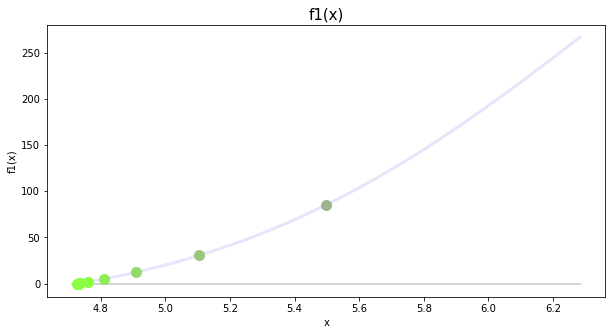

In [24]:
plot_bisection(f1, 8, f1_d, '1e-7', "f1(x)")

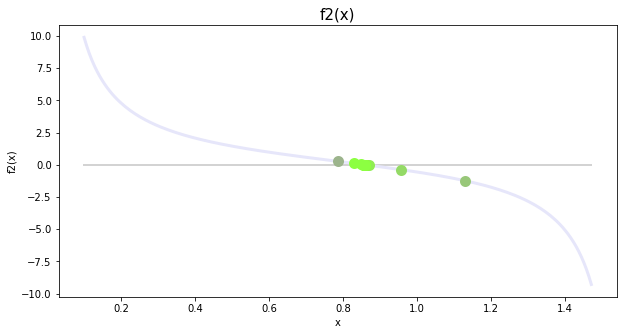

In [25]:
plot_bisection(f2, 8, f2_d, '1e-7', "f2(x)")

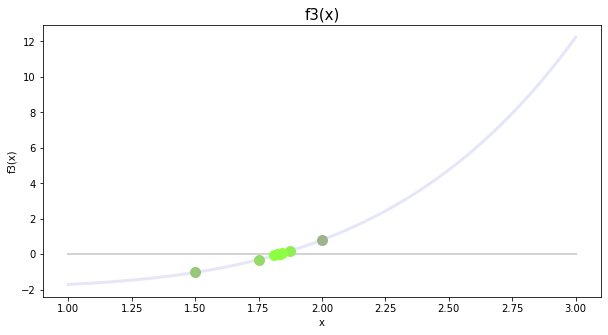

In [26]:
plot_bisection(f3, 8, f3_d, '1e-7', "f3(x)")

Z kolejnymi iteracjami punkty zbliżają się do rozwiązania. Dla pierwszej funkcji wartości są po jednej stronie, z uwagi na umiejscowienie rozwiązania, a dla pozostałych punkty oscylują po dwóch stronach pierwiastka.

<i> c. Narysuj wykres zależności liczby potrzebnych iteracji od bezwzględnej dokładności. </i>

In [29]:
def plot_needed_iterations(f, f_d, title, ax=None):
    if ax is None:  
        fig, ax = plt.subplots(figsize=(10, 6))
        
    epsilons = np.linspace(1e-15, 1e-7, 200)
    needed_iterations = lambda epsilon: bisection(f, 36, f_d, epsilon)[2]
    ax.set_title(title, fontsize=15)
    ax.plot(epsilons, list(map(needed_iterations, epsilons)), 
            color=(203/255, 223/255, 189/255), linewidth=5)
    ax.set_xlabel('epsilon - error')
    ax.set_ylabel('n - needed iterations')

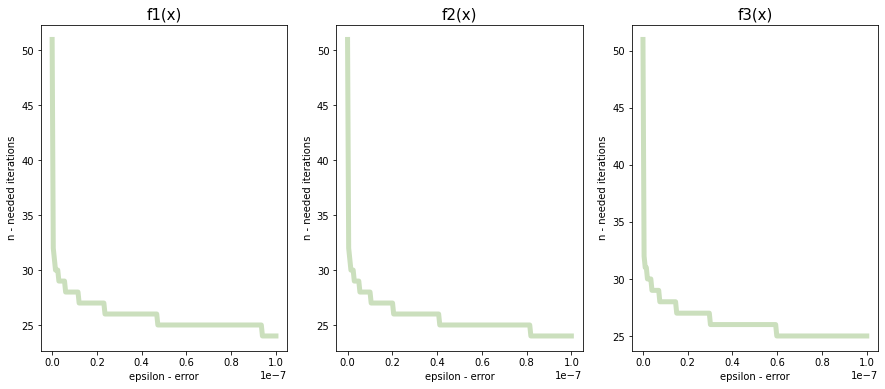

In [30]:
_, ax = plt.subplots(1, 3, figsize=(15, 6))
plot_needed_iterations(f1, f1_d, 'f1(x)', ax[0])
plot_needed_iterations(f2, f2_d, 'f2(x)', ax[1])
plot_needed_iterations(f3, f3_d, 'f3(x)', ax[2])

Możemy zauważyć, że funkcja liczby potrzebnych iteracji od dokładności jest nierosnąca oraz schodkowa (co w oczywisty sposób wynika z przeliczalnej przeciwdziedziny). Analizowane trzy wykresy mają niemalże identyczny charakter.

<i> d. Sprawdź czy spełnia ona równanie $n = \lceil \frac{\log{\frac{b-a}{\epsilon}}}{\log 2} \rceil$ gdzie $n$ to liczba iteracji, $\epsilon$ bezwzględna dokładność, a $a, b$ to granice przedziałów, poprzez porównanie na wykresie. </i>

In [32]:
def plot_compare(f, interval):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    plot_needed_iterations(f, interval, 'needed iterations', ax[0])
    
    epsilons = np.linspace(1e-15, 1e-7, 200)
    a, b = interval
    func = lambda epsilon: ceil(log((b-a)/epsilon)/log(2))
    ax[1].plot(epsilons, list(map(func, epsilons)), 
            color=(241/255, 156/255, 121/255), linewidth=5)
    ax[1].set_title('n(epsilon)')
    
    plot_needed_iterations(f, interval, 'both on one figure', ax[2])
    ax[2].plot(epsilons, list(map(func, epsilons)), 
            color=(241/255, 156/255, 121/255), linewidth=1)

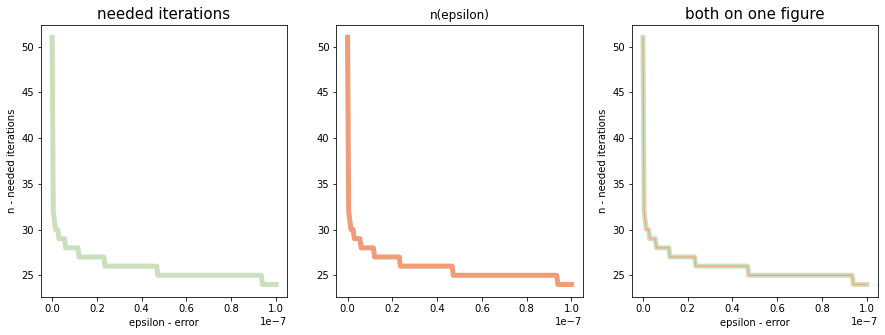

In [33]:
plot_compare(f1, f1_d)

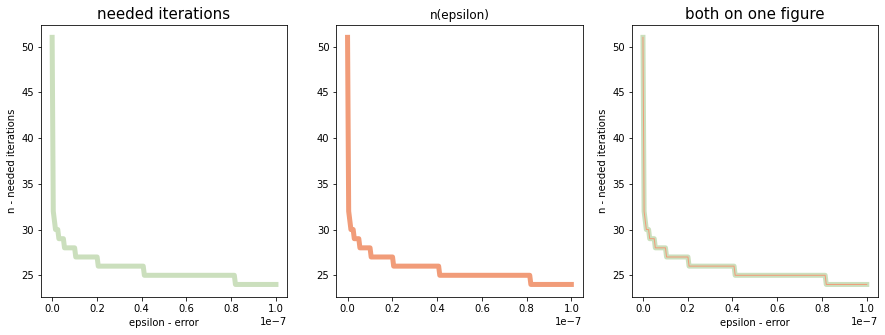

In [34]:
plot_compare(f2, f2_d)

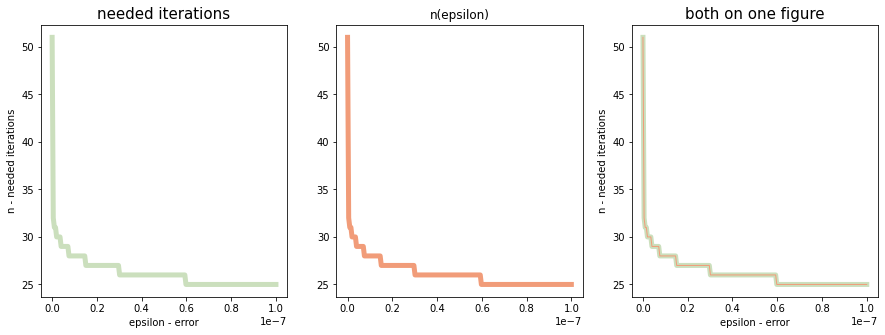

In [35]:
plot_compare(f3, f3_d)

Badane wykresy są sobie tożsame, co prowadzi do wniosku, że liczba iteracji potrzebnych do znalezienia rozwiązania równania przy zadanej dokładności jest opisana funkcją o wskazanym wzorze. Dla ustalonej długości przedziału startowego, w którym szukamy pierwiastka, jest to funkcja jedynie zmiennej epsilon i nie zależy od funkcji.

Tłumaczy to fakt, że wykresy nie różnią się bardzo dla różnych testowanych funkcji, jedyne co wpływa na to, że wykresy nie są identyczne, to różna długość przedziału startowego, który jednak nie wpływa na ogólny charakter odwzorowania.

Przytoczony wzór (o równoważnej formie: $n = \lceil\log_{2}\frac{b-a}{\epsilon}\rceil$) bierze się z faktu, że przy każdej iteracji zmniejszamy długość przedziału 2 razy.

## 2. Metoda Newtona

<i> Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji
(mpmath.mpf). Funkcja ma wykorzystywać dwa kryteria stopu:
* maksymalną liczbę iteracji
* moduł różnicy kolejnych przybliżeń mniejszy od danej wartości ε

Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną do uzyskania określonej dokładności ε. 
</i>

W metodzie Newtona możemy rozpoczynać iterację od różnych wartość początkowych. Znając przedział, możemy na podstawie wykresu wskazać punkt, który leży blisko pierwiastka i zdaje się nie powodować problemów dla tej metody. Możemy także najpierw użyć metody bisekcji, a następnie poprawić wynik metodą Newtona rozpoczynając w w otrzymanym punkcie.

Dla poniższych testów przyjąłem punkt startowy w środku dziedziny.

In [91]:
def newton(f, f_prim, precision, interval, max_iter, epsilon, name=None):
    with workdps(precision):
        epsilon = mpf(epsilon)
        a, b = map(mpf, interval)
        x = (a + b)/mpf(2)
        i = 1
        
        while True:
            if i == max_iter:
                if name:
                    print(f'{name}({x}) \n= {f(x)}, \niterations: {i}')
                return x, f(x), i
            
            x, prev = x - mpf(f(x)/f_prim(x)), x
            i += 1
            if abs(x - prev) < epsilon:
                if name:
                    print(f'{name}({x}) \n= {f(x)}, \niterations: {i}')
                return x, f(x), i
            

<i>Przetestuj działanie funkcji analogicznie do punktów a-c z poprzedniego zadania. Czy wykres zbieżności jest inny w przypadku metody bisekcji? Zinterpretuj wyniki.</i>

pochodne testowanych funkcji:

In [92]:
f1_prim = lambda x: cos(x)*sinh(x) - sin(x)*cosh(x)
f2_prim = lambda x: mpf(-1/x**2) - mpf(1)/cos(x)**2
f3_prim = lambda x: -mpf(2**(-x))*log(2) + exp(x) - 2*sin(x)

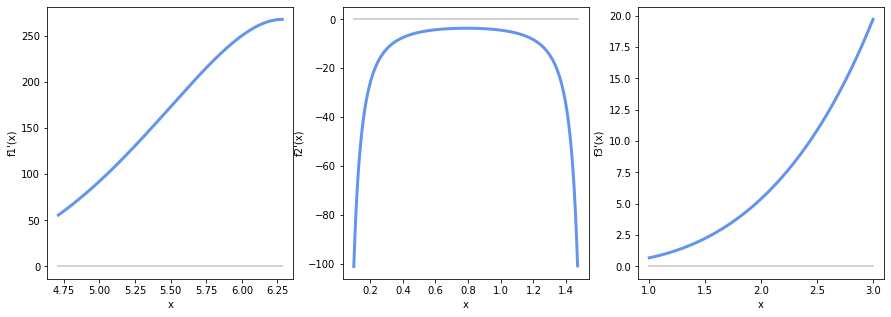

In [93]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
draw_func(f1_prim, f1_d, ax[0], y_label="f1'(x)")
draw_func(f2_prim, f2_d, ax[1], y_label="f2'(x)")
draw_func(f3_prim, f3_d, ax[2], y_label="f3'(x)")

Na zadanych przedziałach pochodne się nie zerują, co jest wymagane w metodzie Newtona.

<i> a. Przetestuj działanie metody dla funkcji podanych na początku instrukcji dla dokładności rzędu $10^{−7}$ , $10^{−15}$ oraz $10^{−33}$ </i>

In [94]:
for f, f_prim, interval, name in [(f1, f1_prim, f1_d, 'f1'), (f2, f2_prim, f2_d, 'f2'), (f3, f3_prim, f3_d, 'f3')]:
    for e in [7, 15, 33]:
        newton(f, f_prim, 60, interval, 100, f'1e-{e}', name)
    print()

f1(4.7300407448627040260261547915165181350856452995653561747962) 
= 0.000000000000000000121441280897847624875776320101560065488786426284848820707675, 
iterations: 7
f1(4.73004074486270402602404810083388481989834616119476102983284) 
= 2.51362595268292358133548716529537330637733656487774530369405e-40, 
iterations: 8
f1(4.73004074486270402602404810083388481989834180070684868909636) 
= 1.69577166321716111519675745465508385556084371597651804377005e-59, 
iterations: 9

f2(0.860333589019382071714877783568309119757814639761568811356552) 
= -0.00000000000000854892960935764872909155356613538414456082875403189143005641, 
iterations: 4
f2(0.860333589019379762483893424137662333411884363237653783003382) 
= -3.26708302087709939625063362823456522630988238857861274487809e-60, 
iterations: 6
f2(0.860333589019379762483893424137662333411884363237653783003381) 
= 0.0, 
iterations: 7

f3(1.82938360193384881713621294691103878324333729069798644898549) 
= 3.97386079391582710461462464814392021035187570031088549

Dzięki metodzie Newtona byliśmy w stanie niemal błyskawicznie znaleźć rozwiązania zadanych równań z dużą precyzją.

<i> b. Narysuj wykres funkcji i dla wybranej dokładności zaznacz kolejne przybliżenia miejsca zerowego. Nasycenie koloru zaznaczonych punktów powinno rosnąć wraz z numerem iteracji. Zinterpretuj wyniki. </i> 

Wykresy sporządziłem dla dokładności $10^{-7}$. Aby były bardziej czytelnie za punkt startowy przyjąłem koniec przedziału, na którym funkcja jest określona.

In [98]:
def plot_newton(f, f_prim, precision, interval, max_iter, epsilon, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=15)
    draw_func(f, interval, ax, color="lavender")
    ax.set_ylabel(title)
    color = zero_saturation(143/255, 242/255, 78/255)
    
    with workdps(precision):
        epsilon = mpf(epsilon)
        a, b = map(mpf, interval)
        x = b
        i = 1
        
        while True:
            color = increase_saturation(*color, 0.2)
            ax.scatter(x, f(x), color=color, linewidth=5, zorder=5)
            if i == max_iter:
                return
            
            x, prev = x - f(x)/f_prim(x), x
            if abs(x - prev) < epsilon:
                return
            
            i += 1

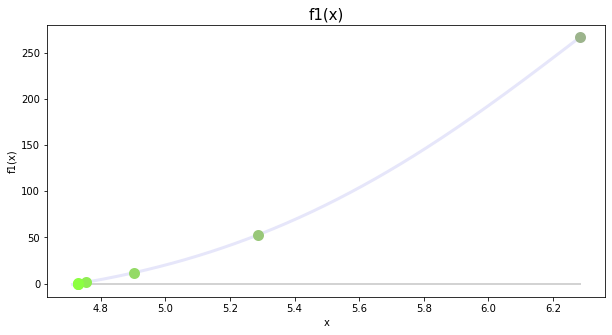

In [99]:
plot_newton(f1, f1_prim, 8, f1_d, 20, '1e-7', 'f1(x)')

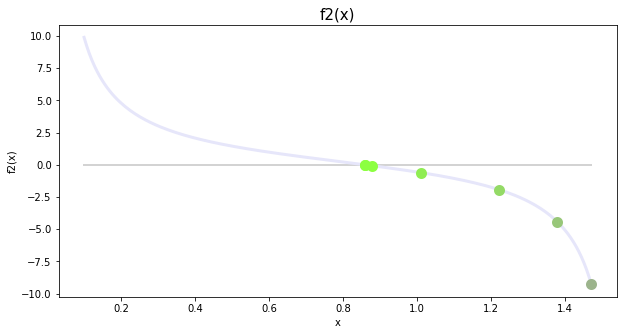

In [100]:
plot_newton(f2, f2_prim, 8, f2_d, 20, '1e-7', 'f2(x)')

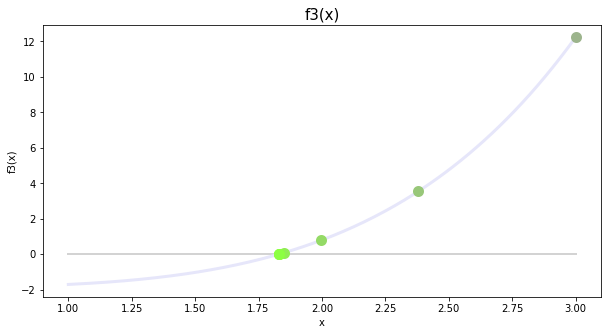

In [101]:
plot_newton(f3, f3_prim, 8, f3_d, 20, '1e-7', 'f3(x)')

Wykresy różnią się od tych dla metody bisekcji. Widzimy, że odległość między kolejnymi punktami zmienia się nieregularnie, w przeciwieństwie do metody bisekcji, gdzie zawsze była dwa razy mniejsza. To, jak bardzo zbliżymy się do pierwiastka, zależy od charakteru funkcji, a konkretnie od wartości funkcji i wartości pochodnej. Na wykresach możemy zauważyć, iż prowadząc styczną w obecnym punkcie, przecina ona oś X w miejscu odciętej kolejnego punktu.

<i> c. Narysuj wykres zależności liczby potrzebnych iteracji od bezwzględnej dokładności. </i>

In [106]:
def plot_needed_iterations_newton(f, f_prim, f_d, title, ax=None):
    if ax is None:  
        fig, ax = plt.subplots(figsize=(10, 6))
        
    epsilons = np.linspace(1e-34, 1e-1, 1000)
    needed_iterations = lambda epsilon: newton(f, f_prim, 37, f_d, 100, mpf(epsilon))[2]
    ax.set_title(title, fontsize=15)
    ax.plot(epsilons, list(map(needed_iterations, epsilons)), 
            color=(203/255, 223/255, 189/255), linewidth=5)
    ax.set_xlabel('epsilon - error')
    ax.set_ylabel('n - needed iterations')

Przyjąłem zakres epsilonów od $10^{-34}$ do $10^{-1}$.

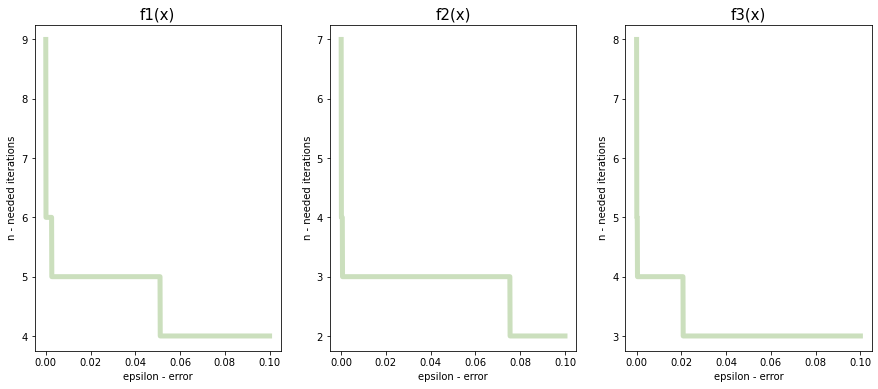

In [108]:
_, ax = plt.subplots(1, 3, figsize=(15, 6))
plot_needed_iterations_newton(f1, f1_prim, f1_d, 'f1(x)', ax[0])
plot_needed_iterations_newton(f2, f2_prim, f2_d, 'f2(x)', ax[1])
plot_needed_iterations_newton(f3, f3_prim, f3_d, 'f3(x)', ax[2])

Zgodnie z oczekiwaniami, liczba potrzebnych iteracji jest nierosnącą funkcją błędu bezwględnego. W przeciwieństwie od metody bisekcji, zależy w znacznym stopniu od testowanej funkcji i doboru początkowej wartości. Potrzebna liczba iteracji dla badanych funkcji zmienia się bardzo wolno i nie zaobserwowałem przyjmowanie wszystkich pośrednich wartości. W porównaniu do wykresów z metody bisekcji, ta zależność jest bardziej nieprzewidywalna, choć zbiór wartości cechuje mała moc.

## Wnioski
- Metoda bisekcji skutecznie znajduje rozwiązania równań z zadaną dokładnością. W porównaniu do innych metod zbiega wolno, jednak liczba potrzebnych iteracji nigdy nie przekracza rzędu 10^2 dla typowych wartości błędu.
- Metoda Newtona zbiega dużo szybciej od metody bisekcji, jednak nie gwarantuje znalezienia pierwiastków dla każdej klasy równań i powinniśmy najpierw przeanalizować przebieg funkcji i dostosować odpowiednio jej działanie.

M. Hawryluk 20.04.2021